# A look at chocolate bars

In [13]:
# import libraries to help with discovery and visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [14]:
df = pd.read_csv("data/flavors_of_cacao.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [15]:
df.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [16]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [17]:
# remove the \n from the column names

columns = ['Specific Bean Origin\nor Bar Name', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Bean\nType', 'Broad Bean\nOrigin'] 
df.columns = df.columns.str.replace('\n', ' ')

In [18]:
df.head(5)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company  (Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1794 non-null   object 
 8   Broad Bean Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [35]:
df.tail(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1785,Zotter,Huiwani Coop,879,2012,75%,Austria,3.00,"Criollo, Trinitario",Papua New Guinea
1786,Zotter,El Ceibo Coop,879,2012,90%,Austria,3.25,,Bolivia
1787,Zotter,Santo Domingo,879,2012,70%,Austria,3.75,,Dominican Republic
1788,Zotter,"Kongo, Highlands",883,2012,68%,Austria,3.25,Forastero,Congo
1789,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


Change percentage to decimal

In [41]:
df['Cocoa Percent'] = df['Cocoa Percent'].apply(lambda x: float(x.strip('%'))/100)

In [42]:
df['Cocoa Percent']

0       0.63
1       0.70
2       0.70
3       0.70
4       0.70
        ... 
1790    0.70
1791    0.65
1792    0.65
1793    0.62
1794    0.65
Name: Cocoa Percent, Length: 1795, dtype: float64

In [49]:
df.columns

Index(['Company  (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'],
      dtype='object')

In [55]:
df['Specific Bean Origin or Bar Name'].value_counts()

Madagascar                               57
Peru                                     45
Ecuador                                  42
Dominican Republic                       37
Venezuela                                21
                                         ..
D.R. Congo, Cru Virunga                   1
Coopertiva Amazona w/ nibs                1
Sambirano Valley, #214, LR, MC            1
Guasare, Zulia Prov., 2015, batch 124     1
Mababa                                    1
Name: Specific Bean Origin or Bar Name, Length: 1039, dtype: int64

In [61]:
df_high_percent = df[df['Cocoa Percent'] > 0.7 ]

In [62]:
df_high_percent.shape

(795, 9)

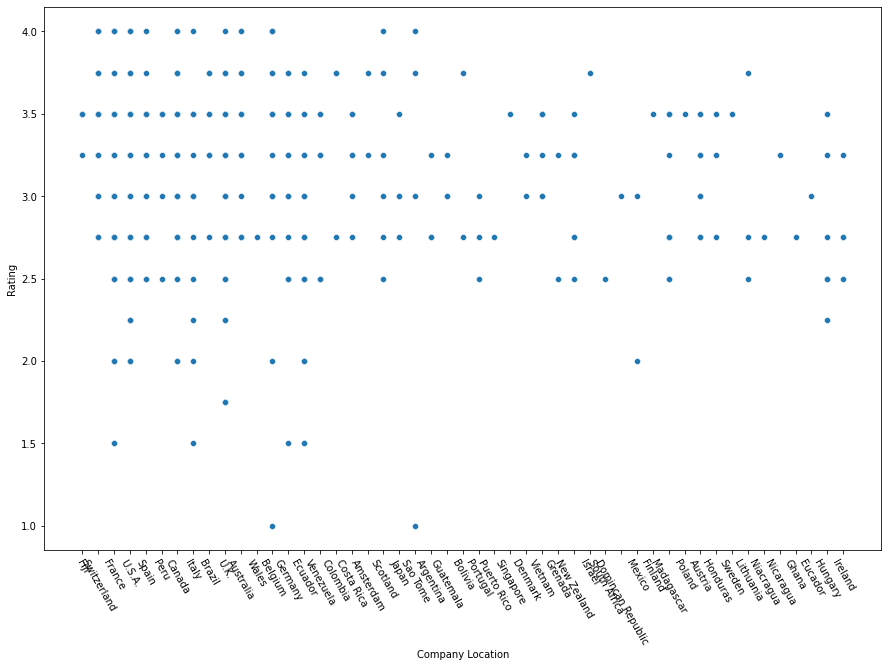

In [69]:
plt.figure(figsize=(15,10))

sns.scatterplot(x='Company Location', y='Rating', data=df_high_percent)
plt.xticks(rotation=-60)

plt.show()

In [78]:
CONTINENTS = {'Fiji': 'Oceania',
              'Switzerland': 'Europe',
              'France': 'Europe', 
              'U.S.A.': 'North America',
              'Peru': 'South America',
              'Canada': 'North America',
              'Italy': 'Europe',
              'Brazil': 'South America',
              'U.K.': 'Europe',
              'Australia': 'Oceania',
              'Wales': 'Europe',
              'Belgium': 'Europe',
              'Germany': 'Europe',
              'Ecuador': 'South America',
              'Venezuela': 'South America',
              'Colombia': 'South America',
              'Costa Rica': 'North America',
              'Amsterdam': 'Europe',
              'Scotland': 'Europe',
              'Japan': 'Oceania',
              'Sao Tome': 'Africa',
              'Argentina': 'South America',
              'Guatemala': 'North America',
              'Bolivia': 'South America',
              'Portugal': 'Europe',
              'Puerto Rico': 'North America',
              'Singapore': 'Asia',
              'Denmark': 'Europe',
              'Vietnam': 'Asia',
              'Grenada': 'North America',
              'New Zealand': 'Oceania',
              'Israel': 'Europe',
              'South Africa': 'Africa',
              'Dominican Republic': 'North America',
              'Mexico': 'North America',
              'Finland': 'Europe',
              'Madagascar': 'Africa',
              'Poland': 'Europe',
              'Austria': 'Europe',
              'Houndoras': 'North America',
              'Sweden': 'Europe',
              'Lithuania': 'Europe',
              'Nicaragua': 'North America',
              'Ghana': 'Africa',
              'Hungary': 'Europe',
              'Ireland': 'Europe'
}


In [79]:
df['Company Location'].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Domincan Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Chile', 'Ghana', 'Iceland', 'Hungary', 'Suriname',
       'Ireland'], dtype=object)

In [80]:
df['Company Location'] = df['Company Location'].str.replace('Eucador', 'Ecuador')
df['Company Location'] = df['Company Location'].str.replace('Niacragua', 'Nicaragua')

In [81]:
df['Company Location'].unique()


array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Domincan Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Chile', 'Ghana', 'Iceland', 'Hungary', 'Suriname',
       'Ireland'], dtype=object)

In [83]:

df_high_percent.rename(columns={'Company Location': 'CompanyLocation'}, inplace=True)
df_high_percent['Continents'] = df_high_percent.CompanyLocation.replace(CONTINENTS)

c:\Users\dmm46\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-83-1d809273601a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_percent['Continents'] = df_high_percent.CompanyLocation.replace(CONTINENTS)


In [85]:
df_high_percent

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,CompanyLocation,Rating,Bean Type,Broad Bean Origin,Continents
26,Adi,"Vanua Levu, Toto-A",705,2011,0.80,Fiji,3.25,Trinitario,Fiji,Oceania
27,Adi,Vanua Levu,705,2011,0.88,Fiji,3.50,Trinitario,Fiji,Oceania
28,Adi,"Vanua Levu, Ami-Ami-CA",705,2011,0.72,Fiji,3.50,Trinitario,Fiji,Oceania
32,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,0.75,Switzerland,3.75,Trinitario,Indonesia,Europe
33,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",502,2010,0.75,Switzerland,2.75,Criollo,Madagascar,Europe
...,...,...,...,...,...,...,...,...,...,...
1778,Zotter,Raw,1205,2014,0.80,Austria,2.75,,,Europe
1779,Zotter,"Bocas del Toro, Cocabo Co-op",801,2012,0.72,Austria,3.50,,Panama,Europe
1784,Zotter,El Oro,879,2012,0.75,Austria,3.00,Forastero (Nacional),Ecuador,Europe
1785,Zotter,Huiwani Coop,879,2012,0.75,Austria,3.00,"Criollo, Trinitario",Papua New Guinea,Europe


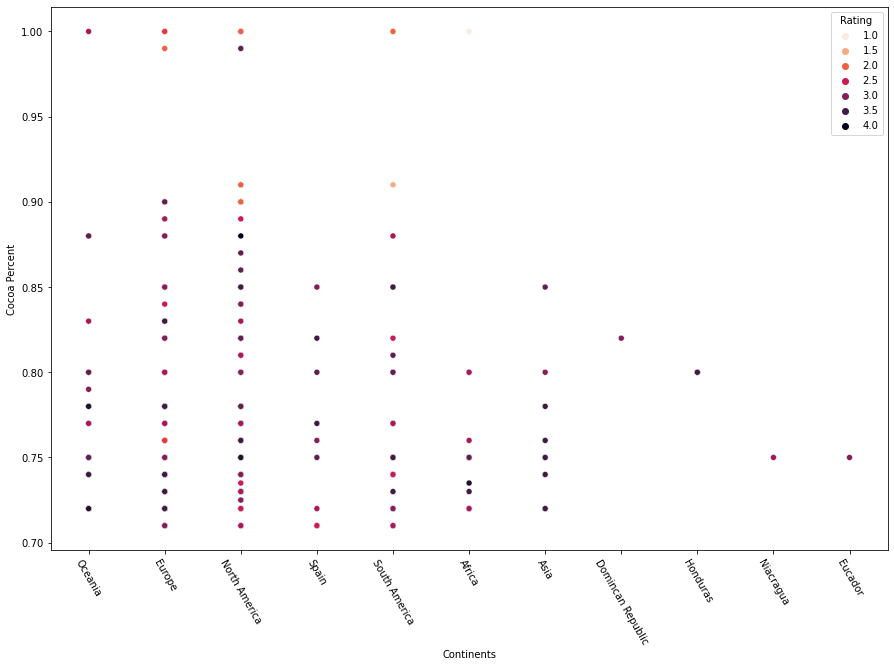

In [93]:
plt.figure(figsize=(15,10))

sns.scatterplot(x='Continents', y='Cocoa Percent', data=df_high_percent, hue='Rating', palette='rocket_r')
plt.xticks(rotation=-60)

plt.show()

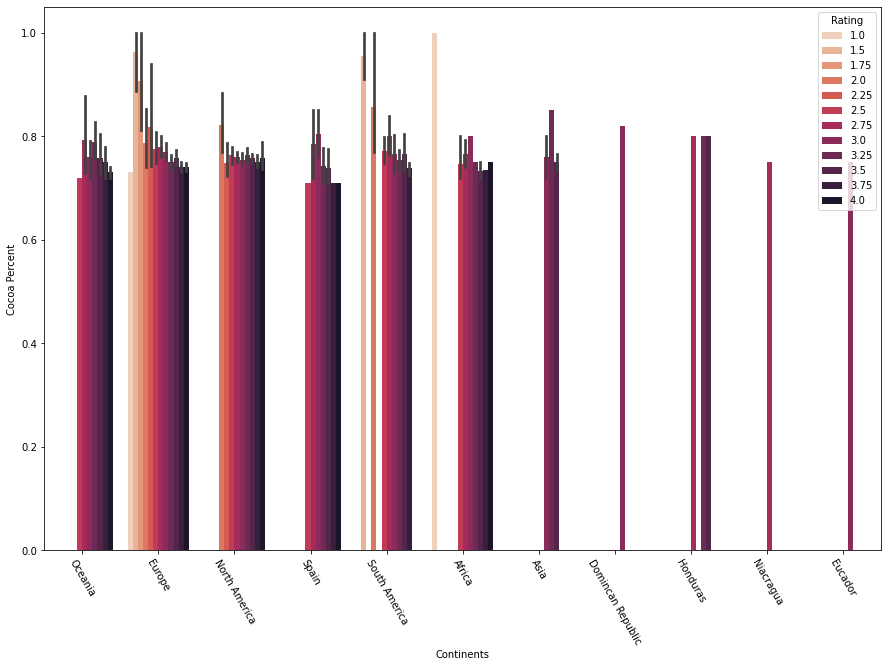

In [95]:
plt.figure(figsize=(15,10))

sns.barplot(x='Continents', y='Cocoa Percent', data=df_high_percent, hue='Rating', palette='rocket_r')
plt.xticks(rotation=-60)

plt.show()

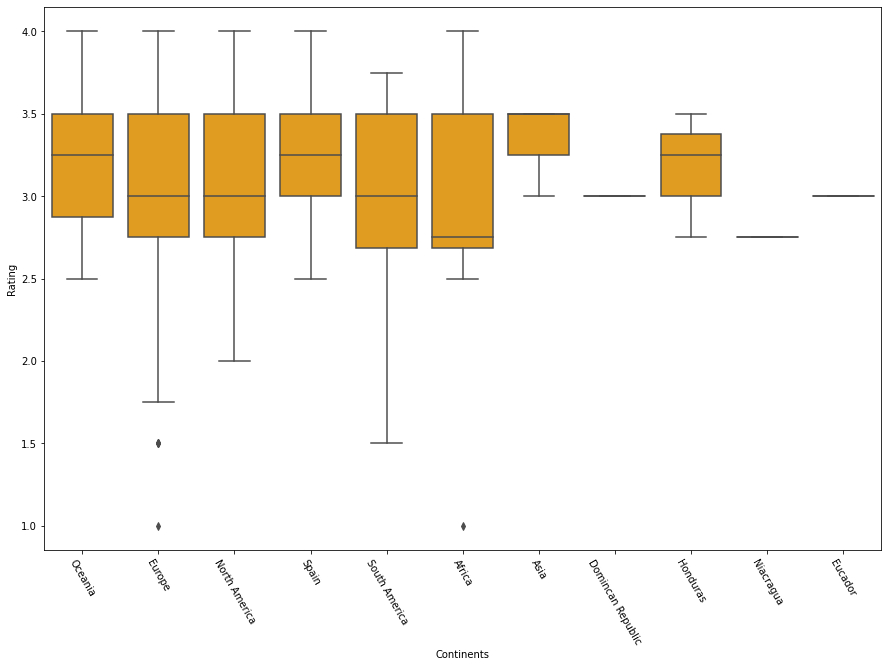

In [101]:
plt.figure(figsize=(15,10))

sns.boxplot(x='Continents', y='Rating', data=df_high_percent, color='orange')
plt.xticks(rotation=-60)

plt.show()

### Asia and Spain seem to have the most consistence with it's raiting, with Oceania close behind. 

## Let's determine if cocoa percent has an impact on the rating across this population

In [107]:
#Find the mean, std, and sample size of percentage > 70%
high_rating_mean = df_high_percent['Rating'].mean()
high_rating_std = df_high_percent['Rating'].std()
high_rating_sample_size = len(df_high_percent['Rating'])

#find the mean, std, and popluation size
mu = df['Rating'].mean()
sigma = df['Rating'].std()
population_size = len(df['Rating'])

H0: There is no difference in rating between cocoa percentages\
H1: Higher percentage cocoa will have a higher rating than population size

In [108]:
stats.ttest_ind_from_stats(mean1=high_rating_mean, std1=high_rating_std, nobs1=high_rating_sample_size,
                           mean2=mu, std2=sigma, nobs2=population_size,
                           equal_var=False)

Ttest_indResult(statistic=-3.703084283959536, pvalue=0.00022082976257972002)

Decision: Reject the null!

In [109]:
def perform_1_sided_t_test(bars, popmean, alpha=0.1):
    _, p_value = stats.ttest_1samp(a=bars,
                                   popmean=popmean)
    print(p_value)
    if p_value < alpha:
        print("reject null")
    else:
        print('fail to reject null')

In [113]:
perform_1_sided_t_test(df_high_percent['Rating'], mu, 0.05)

1.1995355915047925e-05
reject null
